### Importing Libraries 👇

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


plt.style.use('bmh')

## EDA
- The purpose of this EDA is to find insights which will serve us later for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
num_missing = df.isna().sum()[df.isna().sum()>0]
num_missing

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Getting the percentages of missing values


In [4]:
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Relationship of missing values with sales price 👇

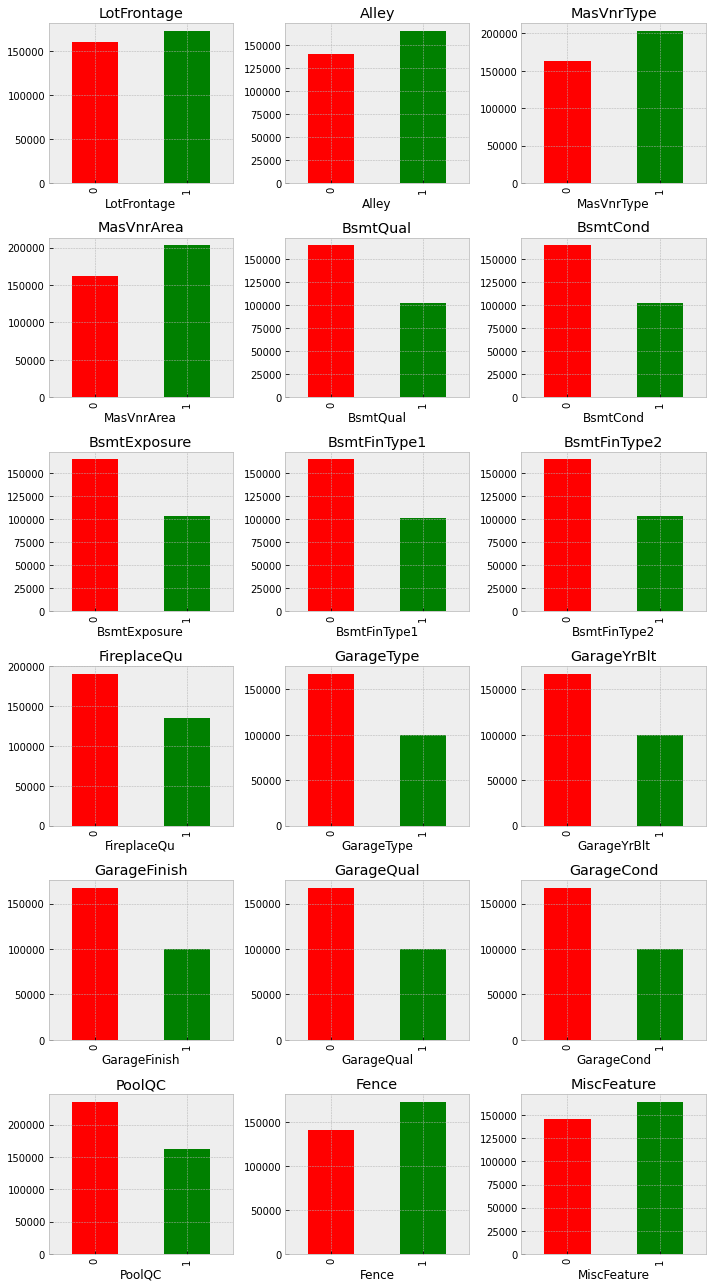

In [6]:
features_with_nv = [f for f in df.columns if df[f].isnull().sum() > 1]
num_features = len(features_with_nv)
num_plots_per_row = 3
num_rows = int(np.ceil(num_features / num_plots_per_row))

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 3 * num_rows))

for i, feature in enumerate(features_with_nv):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    ax = axes[row, col]

    data = df.copy()
    # 1 : data is missing ,0 if not missing
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    colors = ['red', 'green']  # Specify colors for 0 and 1 respectively

    data.groupby(feature)['SalePrice'].median().plot.bar(ax=ax,color = colors)
    ax.set_title(feature)

plt.tight_layout()
plt.show()


In [7]:
numerical_features = [f for f in df.columns if df[f].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  38


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

* Temporal Variables [Eg. DateTime Variables]
    - Lets analyze the Temporal Datetime Variables
    - We will check whether there is a relation between year the house is sold and the sales price

In [8]:
year_feature = [f for f in numerical_features if 'Yr' in f or 'Year' in f]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

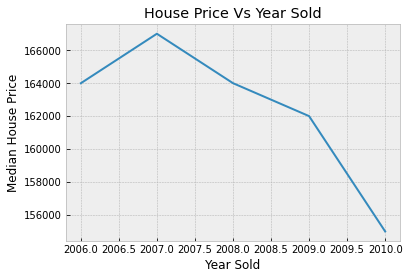

In [9]:
# plt.figure(figsize=(5, 5))
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price Vs Year Sold")
plt.show()


Comparing difference between **Years** **Vs** **SalesPrice**👇

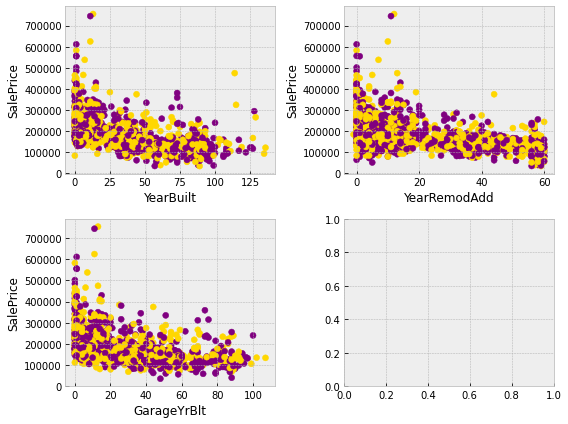

In [10]:
year_feature = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

num_features = len(year_feature)
num_plots_per_row = 2
num_rows = int(np.ceil(num_features / num_plots_per_row))

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(8, 3 * num_rows))

for i, feature in enumerate(year_feature):
    row = i // num_plots_per_row
    col = i % num_plots_per_row
    ax = axes[row, col]

    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        colors = ['purple', 'gold'] * (len(data) // 2)
        ax.scatter(data[feature], data['SalePrice'], color=colors)
        ax.set_xlabel(feature)
        ax.set_ylabel('SalePrice')

plt.tight_layout()
plt.show()


### Numerical Features 👇

#### Discrete Features 👇

In [11]:
disc_feature = [f for f in numerical_features if len((df[f]).unique())<25 and f not in year_feature+['Id']] 
disc_feature.remove('YrSold')
print("Discrete Variables Count: {}".format(len(disc_feature)))
disc_feature

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

Finding relationship between **Discrete Features** and **SalePrice** 👇

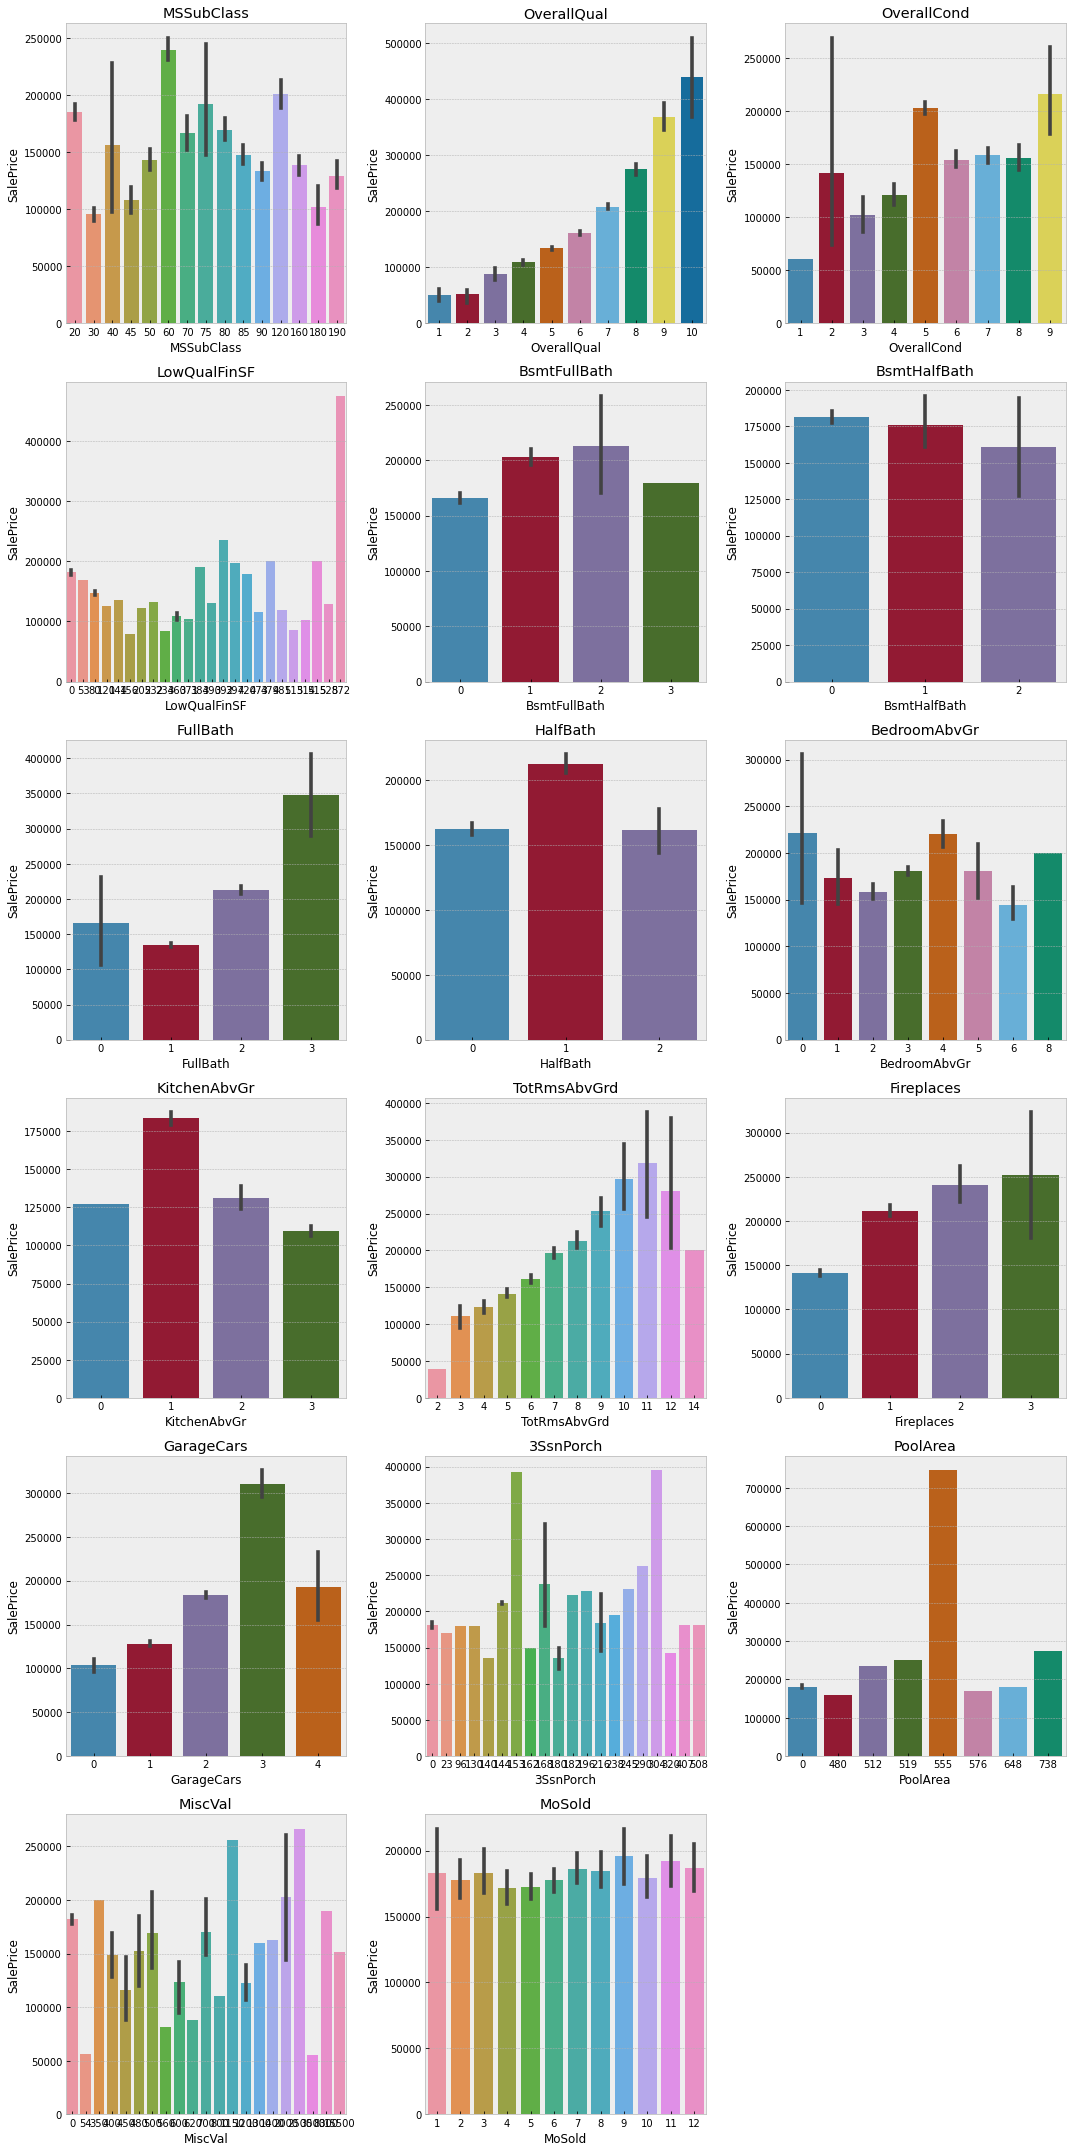

In [12]:
# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_features = len(disc_feature)
num_rows = (num_features - 1) // subplots_per_row + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))

# Flatten the axs array if needed
if num_rows > 1:
    axs = axs.flatten()

# Plot the relationship between each discrete feature and SalePrice
for i, feature in enumerate(disc_feature):
    data = df.copy()
    ax = axs[i]
    sns.barplot(x=feature, y='SalePrice', data=data, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.set_title(feature)

# Remove any unused subplots
if num_features < num_rows * subplots_per_row:
    for j in range(num_features, num_rows * subplots_per_row):
        axs[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


#### Continuous Variable 👇

In [13]:
continuous_feature=[f for f in numerical_features if f not in disc_feature+year_feature+['Id']]
continuous_feature.remove('YrSold')
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Finding relationship between **SalePrice** and **Continuous Variables** 👇

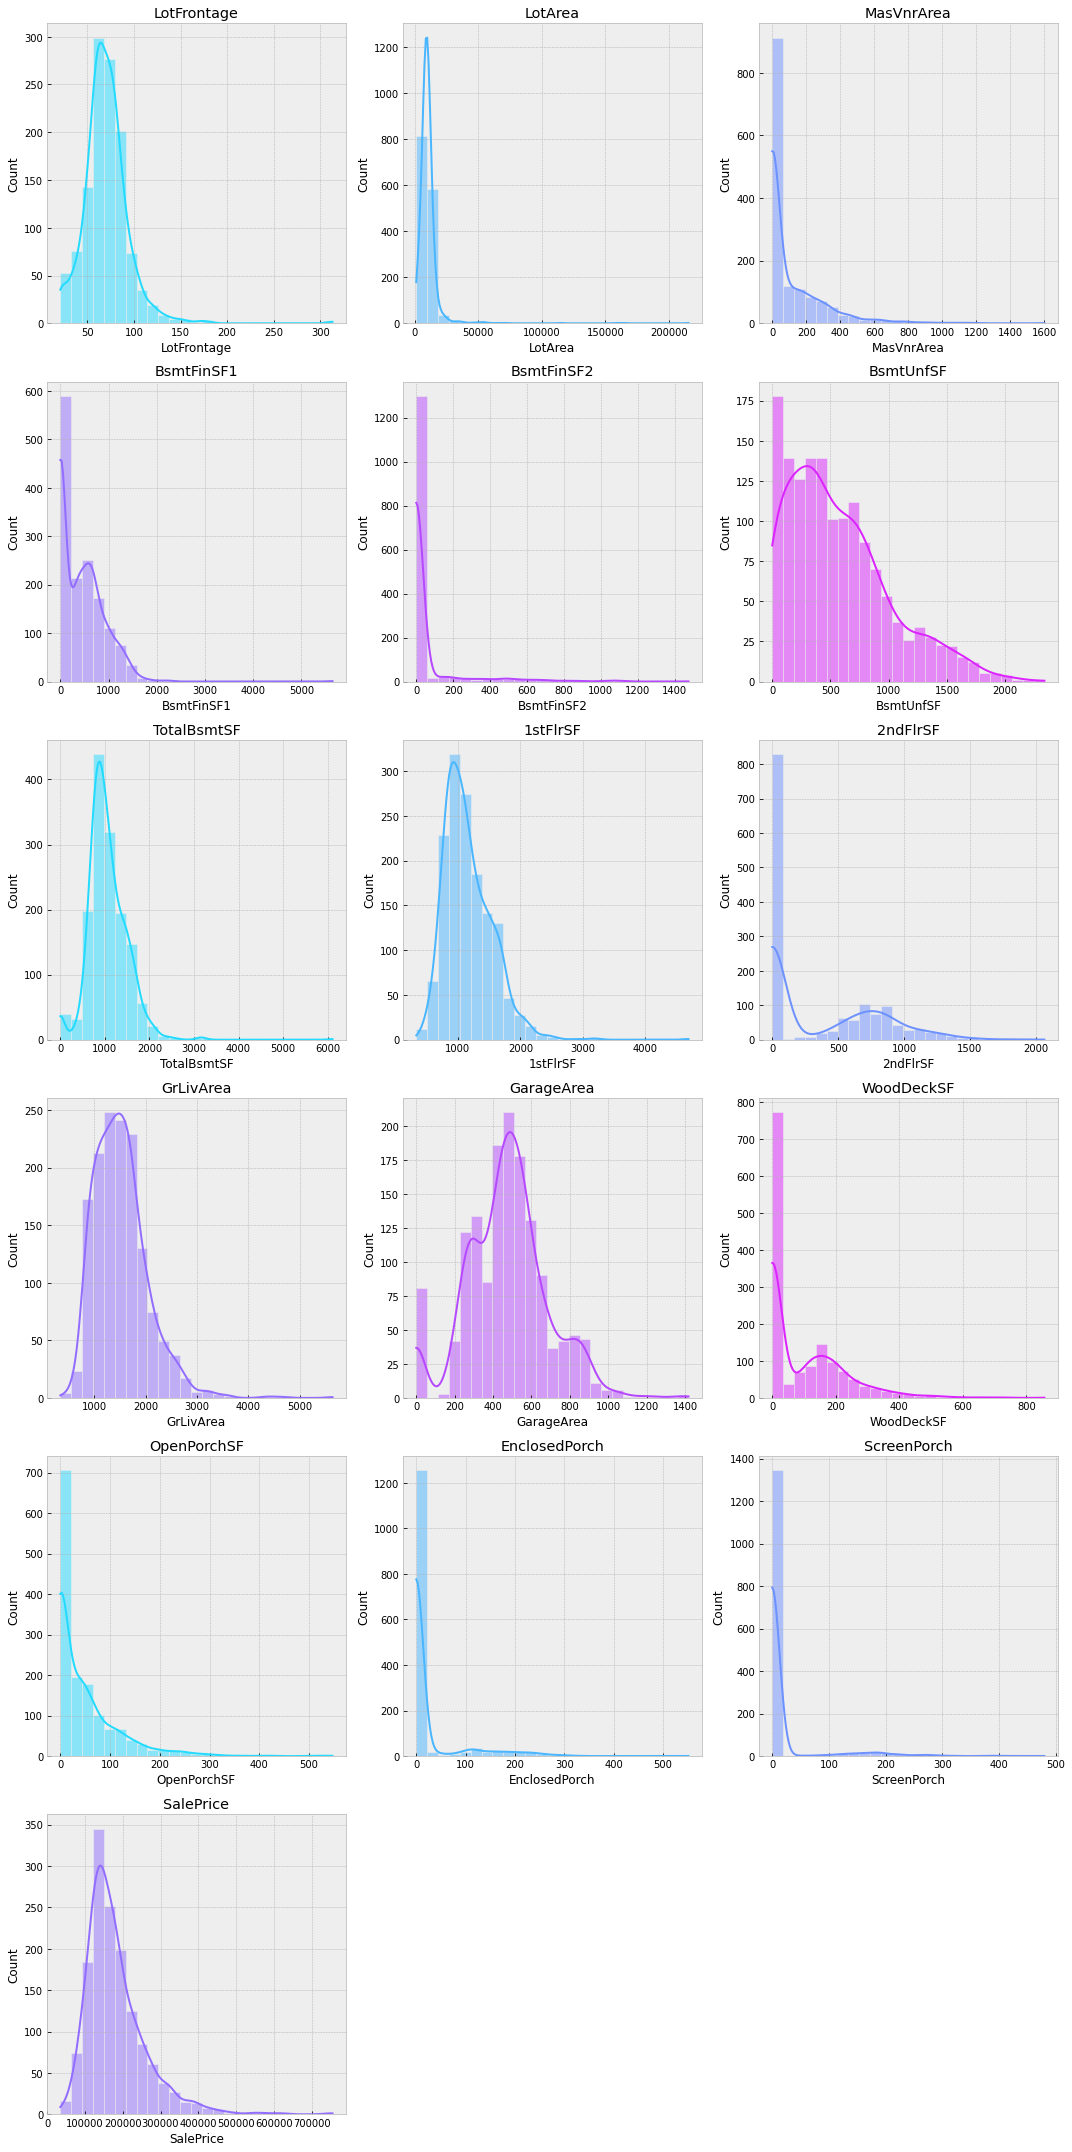

In [14]:
# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_features = len(continuous_feature)
num_rows = (num_features - 1) // subplots_per_row + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, subplots_per_row, figsize=(15, 5*num_rows))

# Flatten the axs array if needed
if num_rows > 1:
    axs = axs.flatten()

# Define a color palette
color_palette = sns.color_palette("cool")

# Plot histograms for each continuous feature with different colors
for i, feature in enumerate(continuous_feature):
    data = df.copy()
    ax = axs[i]
    sns.histplot(data[feature], bins=25, kde=True, ax=ax, color=color_palette[i % len(color_palette)])
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.set_title(feature)

# Remove any unused subplots
if num_features < num_rows * subplots_per_row:
    for j in range(num_features, num_rows * subplots_per_row):
        axs[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


#### Logarithmic Transformation 👇

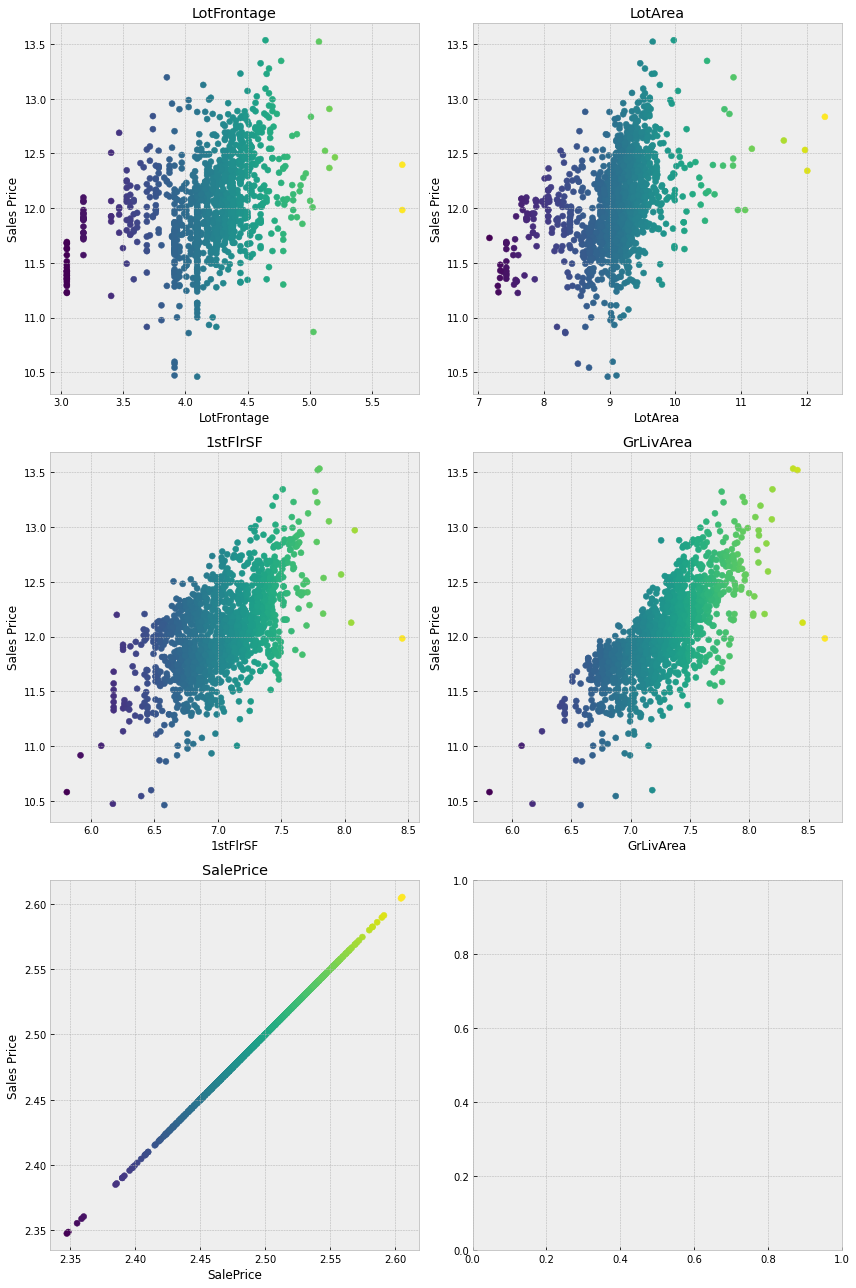

In [15]:
non_empty_features = [f for f in continuous_feature if 0 not in df[f].unique()]

num_plots = len(non_empty_features)
num_rows = (num_plots + 1) // 2  # Calculate the number of rows required

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))  # Create subplots

for i, f in enumerate(non_empty_features):
    data = df.copy()
    data[f] = np.log(data[f])
    data['SalePrice'] = np.log(data['SalePrice'])

    row_idx = i // 2  # Calculate the row index
    col_idx = i % 2  # Calculate the column index

    ax = axs[row_idx, col_idx]  # Select the appropriate subplot

    ax.scatter(data[f], data['SalePrice'], c=data[f], cmap='viridis')  # Add color to markers
    ax.set_xlabel(f)
    ax.set_ylabel('Sales Price')
    ax.set_title(f)

plt.tight_layout()  # Adjust subplot spacing
plt.show()

#### Outliers 👇

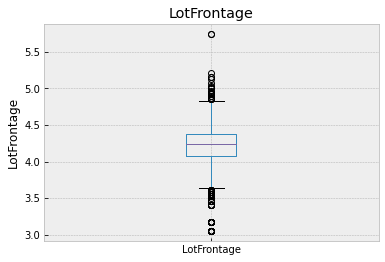

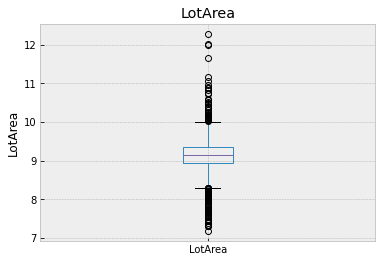

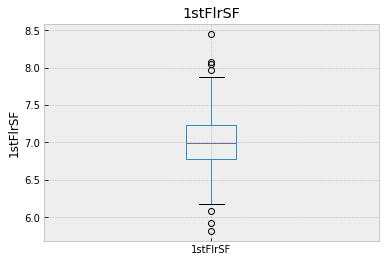

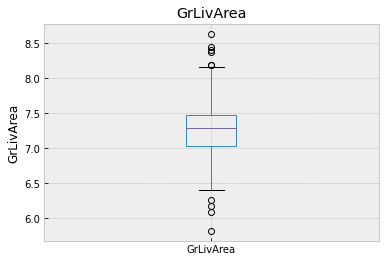

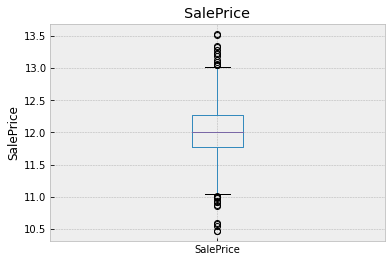

In [16]:
for f in continuous_feature:
    data = df.copy()
    if 0 in data[f].unique():
        pass
    else:
        data[f] = np.log(data[f])
        data.boxplot(column = f)
        plt.ylabel(f)
        plt.title(f)
        plt.show()

There are many features which need to be reomoved as they are not relevant, also much missing values are present,just remove `Id` and the features with 30% or less `NaN` values.

If we take the features we just removed and look at their description in the `data_description.txt` file we can deduct that these features may not be present on all houses (which explains the `NaN` values). In our next Data preparation/cleaning notebook we could tranform them into categorical dummy values.

Checking House Price Distribution through `SalePrice` feature 👇

In [17]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


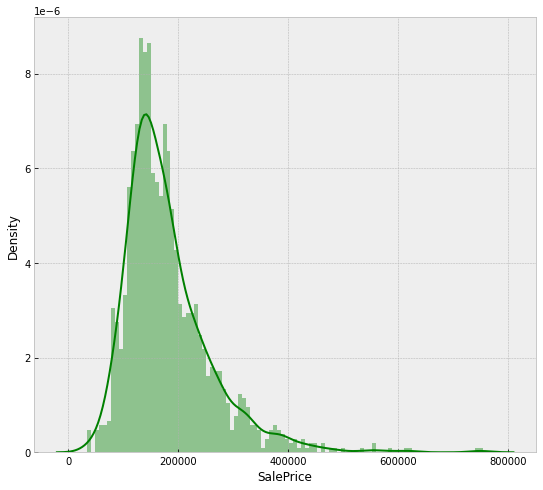

In [18]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.show()

#### Conclusion 👆
- Prices are skewed right 
- Some outliers lies above ~500,000.
- Most prices fall between 100k to 200k

In [19]:
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


- Plotting all numerical features 👇

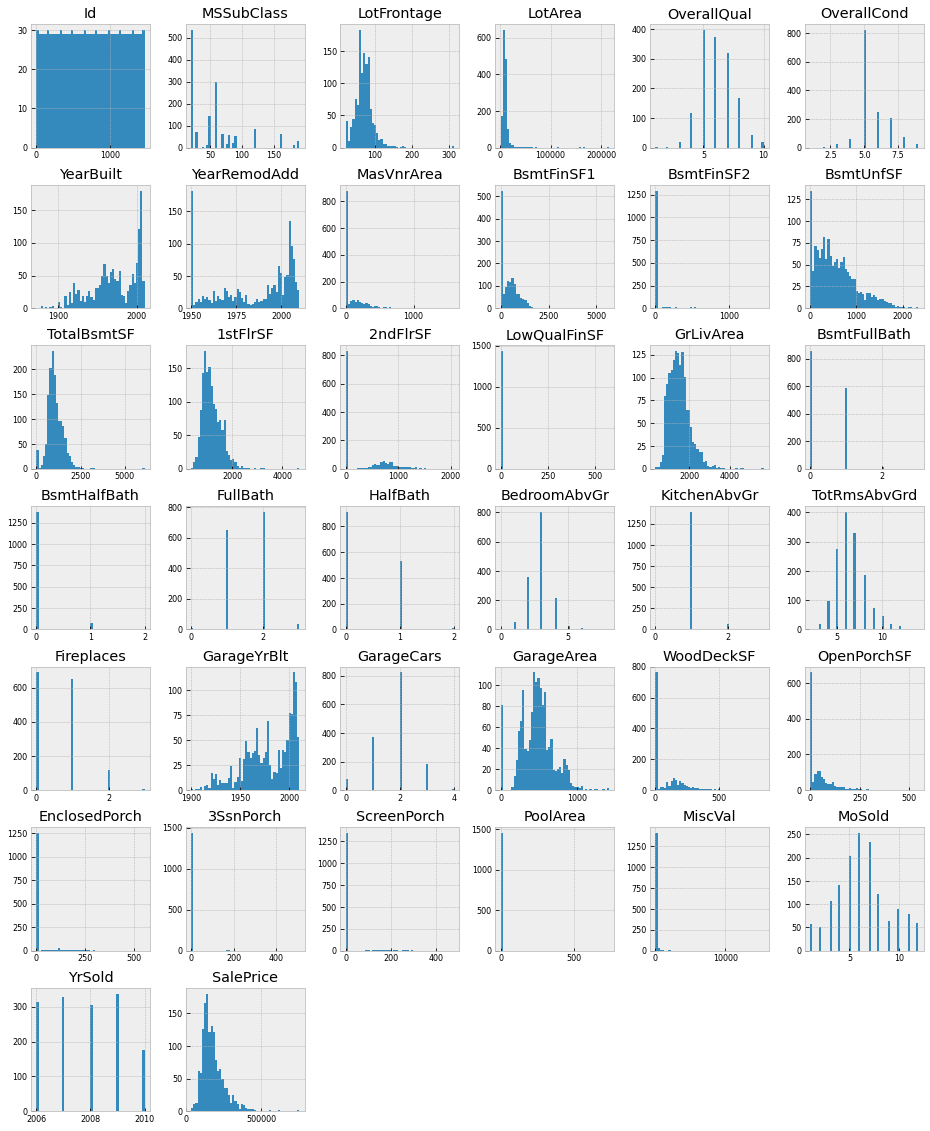

In [20]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Discrete Variables in Dataframe 👇

Features such as `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea`... seems to share a similar distribution to the one we have with `SalePrice`.

#### Correlation 👇

- Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

* **Objectives**:
  * Finding strongly correlated features with `SalePrice`
  * Store them in a var called `features_list`. 
  * Re-use our `df_num` dataset to do so.

In [21]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 since the latest row is SalePrice
# Used -1 to exclude correlation-ship with itself
features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with SalePrice:\n{}".format(len(features_list), features_list))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Another objective will be to find **Outliers** 

- The above correlation is in relation affected by outliers
- Plotting numerical features to see if outliers are visible
- Remove outliers from these features
- Check good correlation after removing outliers

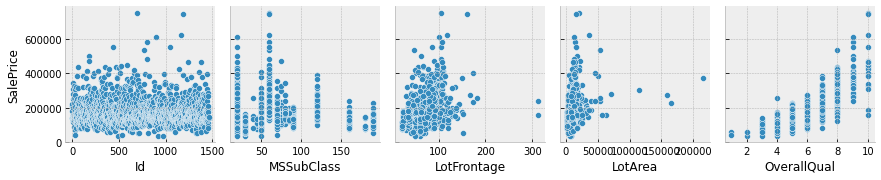

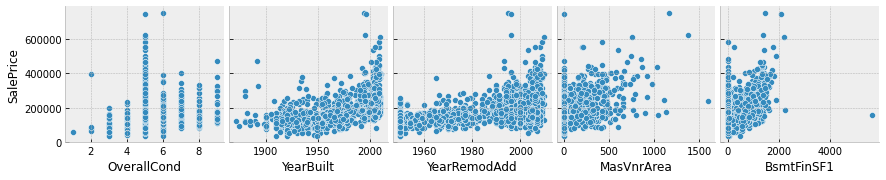

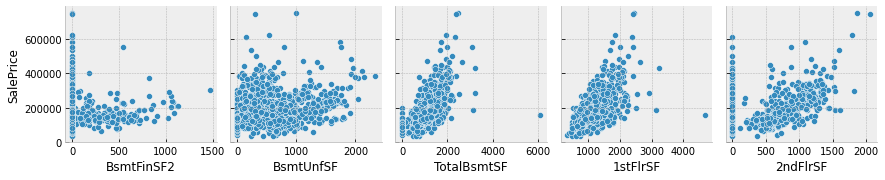

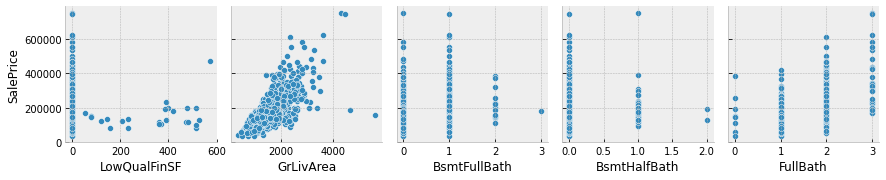

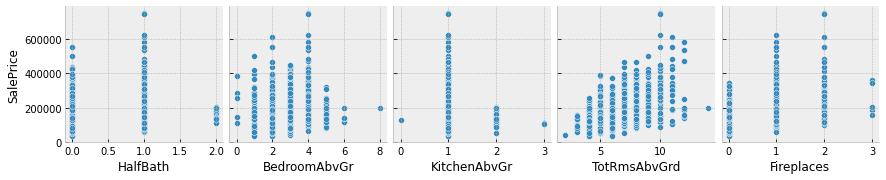

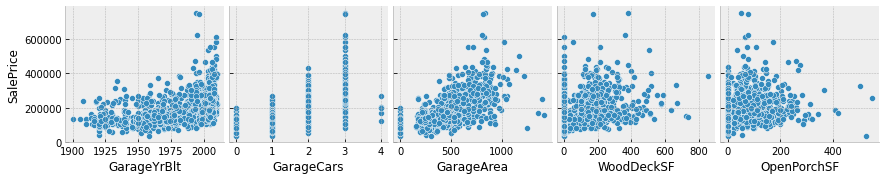

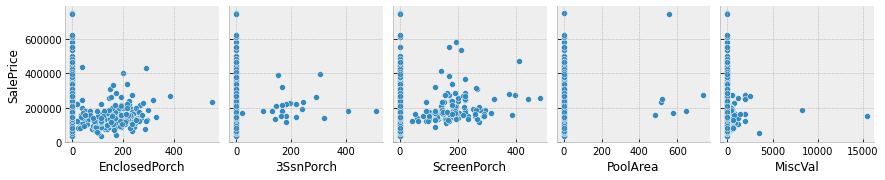

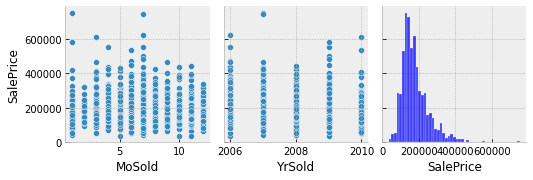

In [22]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])
    plt.show()

* Conclusion: 
    - Linear relationship for many plots Vs `SalePrice`
    - Lot of values ( data points ) are located on `x = 0`
    - Indicates absence of any such feature in that house
    - Hence, Removing `0` values .

In [23]:
import operator #performing operations 

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']] #current feature col, SalePrice
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0] #Filter those whose values are not 0
    individual_features_df.append(tmpDf) #appending them in ind_features_df

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
# Dictionary having Each feature and correlation with SalePrice

all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
# Sorting values on the basis of Correlation i.e second item element in dictionary

for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))
    
    

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
             Id: -0.021916719443430967
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.50710096711

- Thus we found another strongly correlated value

* **Correlation Analysis Results**
    - Correlation analysis between the features and the `SalePrice`. 
    - It identifies strongly correlated values with `SalePrice` and displays them in a specific format.


In [24]:
all_correlations_dict = dict(all_correlations)
features_list = [key for key, value in all_correlations_dict.items() if abs(value) >= 0.5]
features_list.sort(key=lambda x: abs(all_correlations_dict[x]), reverse=True)

print("There are {} strongly correlated values with SalePrice:".format(len(features_list)))
for feature in features_list:
    correlation_value = all_correlations_dict[feature]
    correlation_value_formatted = "{:.6f}".format(correlation_value)
    print("{:<15}: {:>15}".format(feature, correlation_value_formatted))


There are 11 strongly correlated values with SalePrice:
OverallQual    :        0.790982
GrLivArea      :        0.708624
2ndFlrSF       :        0.673305
GarageCars     :        0.637095
TotalBsmtSF    :        0.609681
GarageArea     :        0.608405
1stFlrSF       :        0.605852
FullBath       :        0.574563
TotRmsAbvGrd   :        0.533723
YearBuilt      :        0.522897
YearRemodAdd   :        0.507101


- **Conclusion on correlation 👇:**
    - Found strongly correlated predictors with `SalePrice`
    - Discovered 11 features with strong relationship to house Price (`SalePrice`)
    

* Feature to Feature Relationship 👇

- HeatMap
    - Plotting pairplots can take too much time
    - Hard to interpret
    - Can use HeatMap to get the link between each-feature 

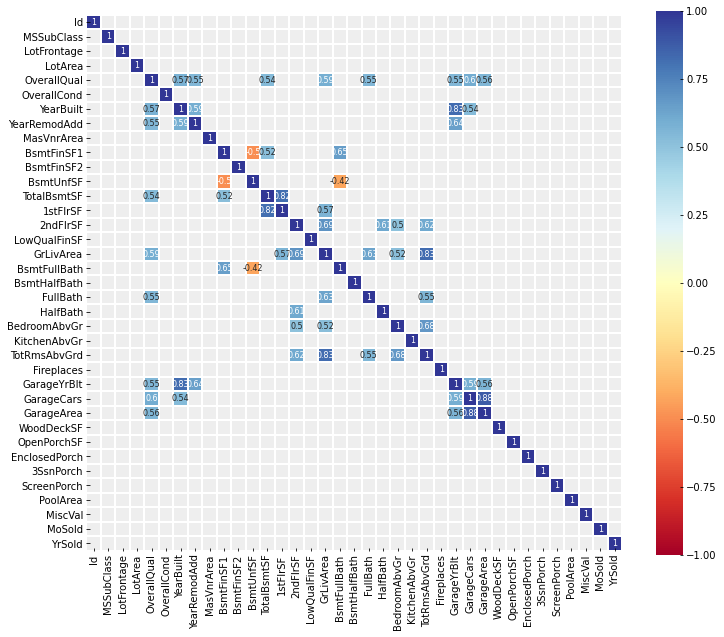

In [25]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='RdYlBu', vmax=1.0, vmin=-1.0, linewidths=0.2,
            annot=True, annot_kws={"size": 8}, square=True);

* Conclusion: 
    - High Correlation between `YearBuild`/`GarageYrBlt` indicates price inflation over the years
    - For `1stFlrSF`/`TotalBsmtSF`, it's  normal that the more the 1st floor is large,the more the total basement will be large.
        
    - Unusual behaviour noticed:
        - Strong negative correlation between `BsmtUnfSF` (Unfinished square feet of basement area) and `BsmtFinSF2` (Type 2 finished square feet).
        - `HalfBath`/`2ndFlrSF` may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom
        
    - Thus, we can combine some features tgether in order to reduce number of features
    - (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) and others indicates that people expect multiples features to be packaged together.

#### Quantitative to Quantitative relationship 👇

* Objectives : 
    - Analysing quantitative features
    - Checking relationship with `SalePrice`
    - Seperating them from categorical features

- Conclusion :
    - features such as `TotalBsmtSF`, `1stFlrSF`, `GrLivArea` have a big spread

#### Categorical Features 👇

Getting all the categorical features from our dataset 👇

In [26]:
cat_features=[f for f in df.columns if data[f].dtypes=='O']
print(f"Total length of categorical features is : {len(cat_features)}")
df[cat_features].head()

Total length of categorical features is : 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Getting a list of unique categorical values in dataset 👇

In [27]:
data = []

for f in cat_features:
    num_categories = len(df[f].unique())
    data.append({'Feature': f, 'Number of Categories': num_categories})

df_cat = pd.DataFrame(data)

df_cat

,Feature,Number of Categories
0,MSZoning,5
1,Street,2
2,Alley,3
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


Relationship between **Categorical variable** and dependent feature **SalePrice**

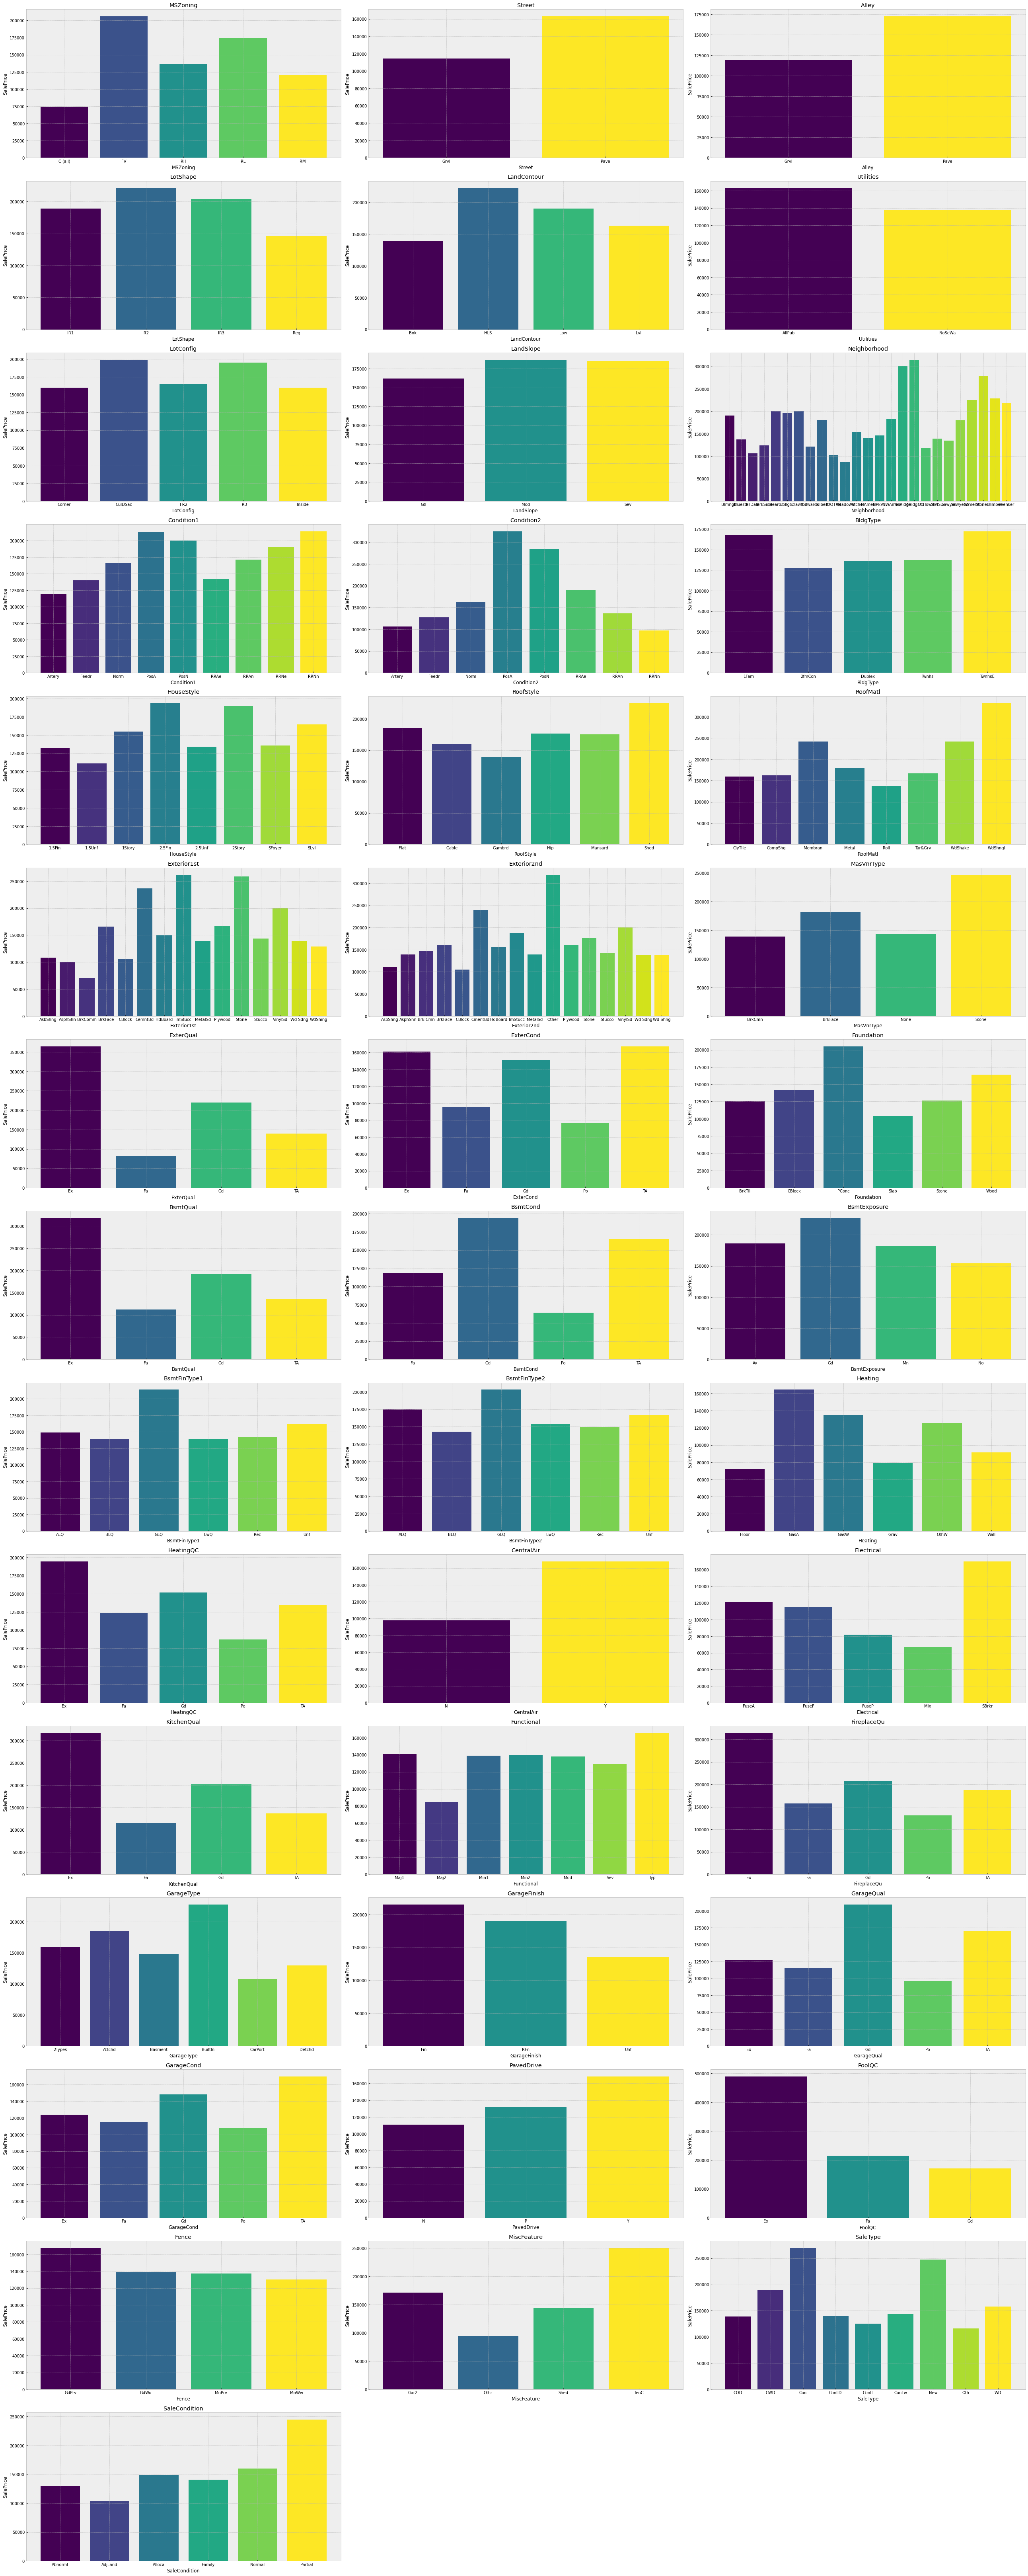

In [28]:
# Filter out categorical features with no data or empty categories
non_empty_features = [
    f for f in cat_features if (df[f].nunique() > 0) and (not df[f].isnull().all())
]

num_plots = len(non_empty_features)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows required
num_cols = min(num_plots, 3)  # Maximum 3 columns per row

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12 * num_cols, 6 * num_rows))  # Create subplots

for i, f in enumerate(non_empty_features):
    data = df.copy()
    data_grouped = data.groupby(f)['SalePrice'].median()

    row_idx = i // num_cols  # Calculate the row index
    col_idx = i % num_cols  # Calculate the column index

    ax = axs[row_idx, col_idx]  # Select the appropriate subplot

    # Create a color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(data_grouped)))

    # Plot the bars with colored bars
    ax.bar(data_grouped.index, data_grouped.values, color=colors)

    ax.set_xlabel(f)
    ax.set_ylabel('SalePrice')
    ax.set_title(f)

# Remove empty subplots if present
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

### Feature Engineering 👇

We need to split the data before applying feature engineering to reduce the chance of data Leakage 👇

##### Handling missing values 👇

Capturing all the missing values by handling the categorical features which are missing 👇

In [29]:
features_nan=[f for f in df.columns if df[f].isnull().sum()>1 and df[f].dtypes=='O']
for f in features_nan:
    print("{}: {}% ".format(f,np.round(df[f].isnull().mean(),4)))

Alley: 0.9377% 
MasVnrType: 0.0055% 
BsmtQual: 0.0253% 
BsmtCond: 0.0253% 
BsmtExposure: 0.026% 
BsmtFinType1: 0.0253% 
BsmtFinType2: 0.026% 
FireplaceQu: 0.4726% 
GarageType: 0.0555% 
GarageFinish: 0.0555% 
GarageQual: 0.0555% 
GarageCond: 0.0555% 
PoolQC: 0.9952% 
Fence: 0.8075% 
MiscFeature: 0.963% 


**Replacing Categorical Variable 👇**

In [30]:
def rep_cat_features(df,features_nan):
    d = df.copy()
    d[features_nan] = d[features_nan].fillna("Missing")
    return d

df = rep_cat_features(df,features_nan)
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

**Replacing numerical Variables 👇**

In [31]:
num_with_nan = [f for f in df.columns if df[f].isnull().sum()>1 and df[f].dtypes != 'o']

for f in num_with_nan:
    print("{}: {}% ".format(f,np.round(df[f].isnull().mean(),4)))    

LotFrontage: 0.1774% 
MasVnrArea: 0.0055% 
GarageYrBlt: 0.0555% 


**Replacing mean values: 👇**

In [32]:
for f in num_with_nan:
    med = df[f].median()
    df[f + 'nan'] = np.where(df[f].isnull(),1,0)
    df[f].fillna(med,inplace = True)
    
df[num_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

**Replacing temporal variables [Date-Time Variables] 👇**

In [33]:
for f in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[f] = df['YrSold'] - df[f]
     
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


**Converting skewness of numerical Features 👇**

- As the numerical variables or features were skewed 
- We need to perform log normal distribution

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [35]:
num_feat=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for f in num_feat:
    df[f]=np.log(df[f])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


* Rare Catgorical Features 👇
    - Removing categorical features that are present in less than 1 % observation

In [36]:
cat_feat = [f for f in df.columns if df[f].dtype == 'O']
print(cat_feat)
len(cat_feat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


43

In [37]:
for feature in cat_feat:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    

In [38]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,4,2008,WD,Abnorml,11.774520,0,0,0
9,10,190,RL,3.912023,8.911934,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2008,WD,Normal,11.678440,0,0,0


In [39]:
for feature in cat_feat:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0


### Feature Scaling 👇

In [41]:
# Need to check which features need to be scaled

feature_sc = [f for f in df.columns if f not in ['Id','SalePrice']]
feature_sc

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(df[feature_sc])

MinMaxScaler()

In [43]:
import pickle
with open('scaler-0.pkl','wb') as f:
    pickle.dump(sc,f)

In [44]:
XTrain = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),
                   pd.DataFrame(sc.transform(df[feature_sc]),
                               columns = feature_sc)],
                  axis = 1)

In [45]:
XTrain.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [46]:
y_train = XTrain[['SalePrice']]
XTrain = XTrain.drop(['Id','SalePrice'],axis = 1) 

#### Feature Selection 👇

- Specify Lasso Regression Model
- Select suitable alpha [equivalent of penalty]
- Alpha 👆,  Features 👇
- Select the features with coefficients non-zero
    

In [47]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feat_sel_model = SelectFromModel(Lasso(alpha = 0.008,
                                      random_state = 0))

# Lasso penalises some of features having higher weights
feat_sel_model.fit(XTrain,y_train)

SelectFromModel(estimator=Lasso(alpha=0.008, random_state=0))

In [48]:
feat_sel_model.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [49]:
selected_feat = XTrain.columns[(feat_sel_model.get_support())]

#let's print same stats
print('total features: {}'.format((XTrain.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feat_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 15
features with coefficients shrank to zero: 67


In [50]:
selected_feat

Index(['Neighborhood', 'OverallQual', 'YearRemodAdd', 'RoofStyle', 'BsmtQual',
       'BsmtExposure', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenQual',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars'],
      dtype='object')

In [51]:
new_df = XTrain[selected_feat]

In [52]:
from sklearn.model_selection import train_test_split

y = y_train
x_train,x_test,y_train,y_test = train_test_split(new_df,y)

In [53]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1095, 15) (365, 15) (1095, 1) (365, 1)


### Using Different Models 

Using modelling techniques we want to use. There are different types of techniques avilable for regression problems like Linear Regression,Ridge Regression, ANN , Decision Trees, Random Forest, etc. We will try and test many such techniques and then choose the one which yields the best results.

Some Techniques are:

#### 1. Linear Regression

- Helps get relationship between target variable and independent variable
- Fits a linear model with coefficients to the data
- Minimizes the residual sum of squares between the target variable in dataset.

#### 2. K Nearest Neighbors

- Type of instance based learning
- Model tries to find number (k) of training examples closest to new point
- Predict output for this new point from these closest neighbors .
- K can be user defined number or vary based on local density of points 

#### 3. Support Vector Regression

- Set of methods that can be used for CART problems
- When used for regression we call it Support Vector Regression


#### 4. Decision Trees

- Create a mode lthat predicts the value of target variable 
- Learning simple Decision rules inferred from data features



#### 5. XGBoost


#### 6. Random Forest
- Random Forest is an ensemble method that uses bagging.
- It combines multiple base models with randomized subsets of data to reduce variance.
- Algorithm(s) for Random Forest can be chosen in the next section.


#### 7. LightGBM

#### Regression Metrics Calculation 👇

The following code initializes empty lists to store evaluation metrics for different regression models. These lists will be used to track and compare the performance of various models.

```python
models = []
MAE = []
r2_train = []
r2_test = []
rmse_scores_train = []
rmse_scores_test = []


In [54]:
models = []
MAE = []

r2_train = []
r2_test = []

rmse_scores_train = []
rmse_scores_test = []

- **Inputs:**
  - `model_name`: Name of the regression model being evaluated
  - `model`: Regression model instance
  - `x_train`, `y_train`: Training data features and labels
  - `x_test`, `y_test`: Testing data features and labels
  - `models`: List to store the names of all evaluated models
  - `MAE`: List to store Mean Absolute Error for each model
  - `r2_train_list`: List to store R^2 scores for the training data of each model
  - `r2_test_list`: List to store R^2 scores for the testing data of each model
  - `rmse_scores_train`: List to store RMSE scores for the training data of each model
  - `rmse_scores_test`: List to store RMSE scores for the testing data of each model

- **Functionality:**
  - Predicts the target variable for the training and testing data using the provided model.
  - Calculates RMSE, R^2 score, and MAE for both the training and testing data.
  - Prints the calculated metrics for the training and testing data.
  - Appends the model name, MAE, R^2 scores, and RMSE scores to the corresponding lists.


In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_regression_metrics(model_name, model, x_train, y_train, x_test, y_test, models, MAE, r2_train_list, r2_test_list, rmse_scores_train, rmse_scores_test):
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
    print(f'RMSE train data {model_name}: {rmse_train:.4f}')

    r2_train = r2_score(y_train, train_pred)
    print(f'R^2 train data {model_name}: {r2_train:.4f}')

    rmse_test = np.sqrt(mean_squared_error(y_test, test_pred))
    print(f'RMSE test data {model_name}: {rmse_test:.4f}')

    r2_test = r2_score(y_test, test_pred)
    print(f'R^2 test data {model_name}: {r2_test:.4f}')

    mae = mean_absolute_error(y_test, test_pred)
    print(f'MAE test data {model_name}: {mae}')

    models.append(model_name)
    MAE.append(mae)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    rmse_scores_train.append(rmse_train)
    rmse_scores_test.append(rmse_test)


### 1. Linear Regression
- For Linear Regression, we will choose three algorithmic implementations:
    - Ridge Regression
    - Elastic Net
- We will use the implementations provided in the Scikit-Learn package for these algorithms.


In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline


LR = LinearRegression()
LR.fit(x_train, y_train)

calculate_regression_metrics("Linear Regression",LR,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data Linear Regression: 0.1438
R^2 train data Linear Regression: 0.8657
RMSE test data Linear Regression: 0.1441
R^2 test data Linear Regression: 0.8819
MAE test data Linear Regression: 0.10881226153079489


**Using Ridge Regression 👇**

In [57]:
# Ridge Regression
pipeline = make_pipeline(Ridge(alpha=1.0))
pipeline.fit(x_train, y_train)

calculate_regression_metrics("Ridge",pipeline,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data Ridge: 0.1440
R^2 train data Ridge: 0.8653
RMSE test data Ridge: 0.1448
R^2 test data Ridge: 0.8806
MAE test data Ridge: 0.1089065696615699


#### **2 . K Nearest Neighbors 👇**

In [58]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

reg_KNN = KNeighborsRegressor(n_neighbors = 2)
reg_KNN.fit(x_train,y_train)

calculate_regression_metrics("KNN ",reg_KNN,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data KNN : 0.1048
R^2 train data KNN : 0.9287
RMSE test data KNN : 0.1989
R^2 test data KNN : 0.7749
MAE test data KNN : 0.14650576432028026


#### **3. Support Vector Regressor 👇**

In [59]:
from sklearn.svm import SVR
reg_SVR = SVR(kernel = 'rbf')
reg_SVR.fit(x_train, y_train)

calculate_regression_metrics("SVR",reg_SVR,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data SVR: 0.1136
R^2 train data SVR: 0.9162
RMSE test data SVR: 0.1478
R^2 test data SVR: 0.8757
MAE test data SVR: 0.10612640096864075


#### **4 . Decision Tree Regression 👇**

In [60]:
reg_DT = DecisionTreeRegressor(random_state = 0)
reg_DT.fit(x_train,y_train)

calculate_regression_metrics("DT ",reg_DT,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data DT : 0.0035
R^2 train data DT : 0.9999
RMSE test data DT : 0.1988
R^2 test data DT : 0.7752
MAE test data DT : 0.1468519415242026


#### **5. XGBoost Regressor 👇**

In [61]:
import xgboost
import warnings
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')
reg = xgboost.XGBRegressor()
booster = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

# HyperParameters optimization
n_est = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_est,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=reg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   37.6s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   52.6s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [62]:
random_cv.best_estimator_


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
reg_XGB=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
reg_XGB.fit(x_train,y_train)

[17:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=2, max_leaves=None, min_child_weight=1, missing=1,
             monotone_constraints=None, n_estimators=900, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear', ...)

In [64]:
calculate_regression_metrics("XGB",reg_XGB,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

print()
print()

RMSE train data XGB: 0.0790
R^2 train data XGB: 0.9595
RMSE test data XGB: 0.1449
R^2 test data XGB: 0.8806
MAE test data XGB: 0.10489405894441112




#### **6. RandomForest Regressor 👇**

In [65]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


reg_RF = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = reg_RF, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    8.7s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   16.0s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [66]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)

In [67]:
reg_RFF = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)
reg_RFF.fit(x_train,y_train)

calculate_regression_metrics("RF",reg_RFF,x_train,y_train,x_test,y_test,
                            models,MAE, r2_train, r2_test, rmse_scores_train,
                            rmse_scores_test)

RMSE train data RF: 0.0776
R^2 train data RF: 0.9609
RMSE test data RF: 0.1472
R^2 test data RF: 0.8767
MAE test data RF: 0.10382434841527748


In [68]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

calculate_regression_metrics("LightGBM Regressor", lgbm, x_train, y_train, x_test, y_test, models, MAE, r2_train, r2_test, rmse_scores_train, rmse_scores_test)

RMSE train data LightGBM Regressor: 0.0709
R^2 train data LightGBM Regressor: 0.9674
RMSE test data LightGBM Regressor: 0.1512
R^2 test data LightGBM Regressor: 0.8699
MAE test data LightGBM Regressor: 0.11012421919553601


In [69]:
len(models)

8

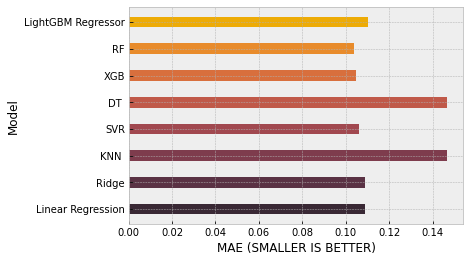

In [70]:
fig,ax = plt.subplots()
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
plt.barh(y=range(len(models)),tick_label = models,width = MAE,
        height = 0.4,color = colors)
ax.set(xlabel = "MAE (SMALLER IS BETTER)",ylabel = "Model")
plt.show()

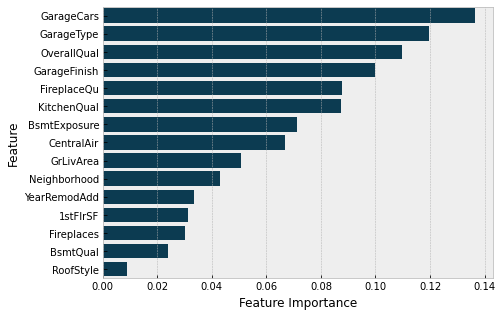

In [71]:
xgb_feature_importances = reg_XGB.feature_importances_
xgb_feature_importances = pd.Series(
    xgb_feature_importances, index=x_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances, 
            y=xgb_feature_importances.index, 
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

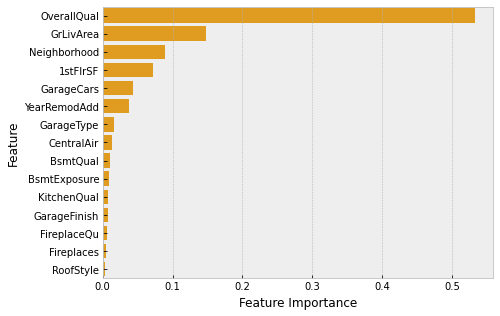

In [72]:
reg_RF.fit(x_train,y_train)

rf_feature_importances = reg_RF.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=x_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

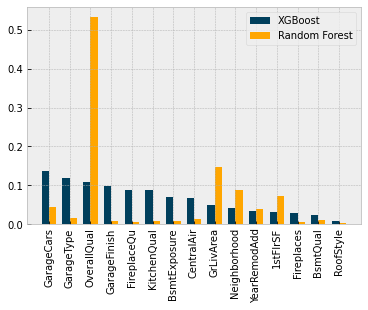

In [73]:
common_imp_feat = [x for x in xgb_feature_importances.index 
                   if x in rf_feature_importances.index]
commImpFeat_xgb_scores = [xgb_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_xgb_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_xgb_scores, width,
       color='#003f5c', label='XGBoost');
ax.bar(ind + width/2, commImpFeat_rf_scores, width, 
       color='#ffa600', label='Random Forest')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

Thus based on the MAE scores, we will consider the **Random Forest Regressor** as our best model to implement the further things

In [74]:
import pickle

with open('house-price-prediction.pkl','wb') as f:
    pickle.dump(reg_RF,f)

In [78]:
x_train.head()

,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,CentralAir,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars
1272,0.272727,0.444444,0.688525,1.0,0.50,0.25,1.0,0.389561,0.364152,0.333333,0.000000,0.2,0.8,0.333333,0.25
1032,1.000000,0.777778,0.229508,0.0,0.75,0.25,1.0,0.529125,0.714884,0.666667,0.333333,0.6,0.8,0.666667,0.75
1406,0.636364,0.444444,0.049180,0.0,0.75,0.75,1.0,0.315102,0.294550,0.333333,0.000000,0.2,0.4,0.333333,0.50
351,0.772727,0.666667,0.344262,0.0,0.75,1.00,1.0,0.556390,0.520099,0.666667,0.333333,0.6,0.8,0.666667,0.50
86,0.590909,0.555556,0.081967,0.0,0.75,0.75,1.0,0.271267,0.545235,0.666667,0.333333,0.8,1.0,1.000000,0.50


In [80]:
y_train.head()

,SalePrice
1272,11.827736
1032,12.644328
1406,11.798104
351,12.154779
86,12.066811


In [81]:
selected_features = {
    "Neighborhood": 0.636364,
    "OverallQual": 0.666667,
    "YearRemodAdd": 0.049180,
    "RoofStyle": 0.0,
    "BsmtQual": 0.75,
    "BsmtExposure": 0.25,
    "CentralAir": 1.0,
    "1stFlrSF": 0.293297,
    "GrLivArea": 0.526374,
    "KitchenQual": 0.666667,
    "Fireplaces": 0.0,
    "FireplaceQu": 0.2,
    "GarageType": 0.8,
    "GarageFinish": 1.0,
    "GarageCars": 0.5
}


selected_feature_names = list(selected_features.keys())
selected_feature_names

['Neighborhood',
 'OverallQual',
 'YearRemodAdd',
 'RoofStyle',
 'BsmtQual',
 'BsmtExposure',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars']

In [86]:
selected_features = [
    'Neighborhood',
    'OverallQual',
    'YearRemodAdd',
    'RoofStyle',
    'BsmtQual',
    'BsmtExposure',
    'CentralAir',
    '1stFlrSF',
    'GrLivArea',
    'KitchenQual',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageCars'
]


new_scaler = MinMaxScaler()
new_scaler.fit(df[selected_features])
scaled_features = new_scaler.transform(df[selected_features])
updated_scaler = MinMaxScaler()
updated_scaler.min_ = np.min(scaled_features, axis=0)
updated_scaler.scale_ = np.max(scaled_features, axis=0) - np.min(scaled_features, axis=0)


In [88]:
with open('updated-scaler.pkl','wb') as f:
    pickle.dump(updated_scaler,f)